<a href="https://colab.research.google.com/github/krishnadixit05/Deep-Learning/blob/main/DL_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5),
									std = (0.5, 0.5, 0.5))])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
	root="./CIFAR10/train", train=True,
	transform=normalize_transform,
	download=True)

test_dataset = torchvision.datasets.CIFAR10(
	root="./CIFAR10/test", train=False,
	transform=normalize_transform,
	download=True)

#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class CNN(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.model = torch.nn.Sequential(
			#Input = 3 x 32 x 32, Output = 32 x 32 x 32
			torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 32 x 32 x 32, Output = 32 x 16 x 16
			torch.nn.MaxPool2d(kernel_size=2),

			#Input = 32 x 16 x 16, Output = 64 x 16 x 16
			torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 64 x 16 x 16, Output = 64 x 8 x 8
			torch.nn.MaxPool2d(kernel_size=2),

			#Input = 64 x 8 x 8, Output = 64 x 8 x 8
			torch.nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 64 x 8 x 8, Output = 64 x 4 x 4
			torch.nn.MaxPool2d(kernel_size=2),

			torch.nn.Flatten(),
			torch.nn.Linear(128*4*4, 1024),
			torch.nn.ReLU(),
			torch.nn.Linear(1024, 10)
		)

	def forward(self, x):
		return self.model(x)


Epoch 1/10: Training loss = 1.596427491558787
Epoch 2/10: Training loss = 1.3212851246299646
Epoch 3/10: Training loss = 1.2143856004985703
Epoch 4/10: Training loss = 1.1345886511875845
Epoch 5/10: Training loss = 1.0736336726361833
Epoch 6/10: Training loss = 1.0288418273791633
Epoch 7/10: Training loss = 0.9934260041817374
Epoch 8/10: Training loss = 0.9677533202464014
Epoch 9/10: Training loss = 0.9465280652351087
Epoch 10/10: Training loss = 0.9292455298821335


Text(0, 0.5, 'Training loss')

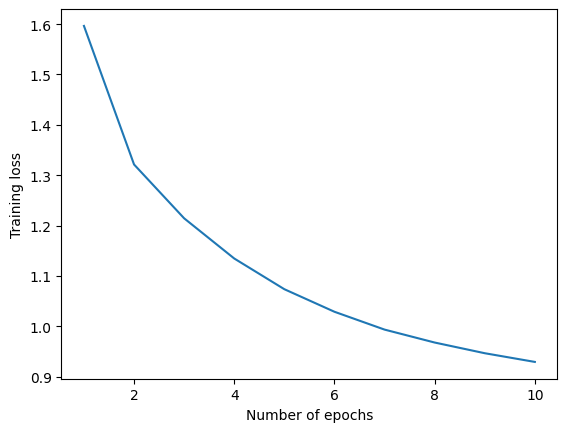

In [ ]:
#Defining the model hyperparameters
num_epochs = 10
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end=' ')
    train_loss = 0

    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):

        #Extracting images and target labels for the batch being iterated
        # No device assignment here
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    #Printing loss for each epoch
    train_loss_list.append(train_loss / len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1, num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


In [ ]:
test_acc = 0
model.eval()

with torch.no_grad():
    # Iterating over the test dataset in batches
    for i, (images, labels) in enumerate(test_loader):

        # No device assignment here
        y_true = labels

        # Calculating outputs for the batch being iterated
        outputs = model(images)

        # Calculated prediction labels from model
        _, y_pred = torch.max(outputs.data, 1)

        # Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")
